<a href="https://colab.research.google.com/github/omuremreyildiz/DSA_210_TERM_PROJECT/blob/main/dsa210_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()
#to download files please check my github page again, i will submit there 5 excel files

Saving 2019type.xls to 2019type (4).xls
Saving 2020type.xls to 2020type (3).xls
Saving 2021type.xls to 2021type (3).xls
Saving 2022type.xls to 2022type (2).xls
Saving 2023type.xls to 2023type (3).xls


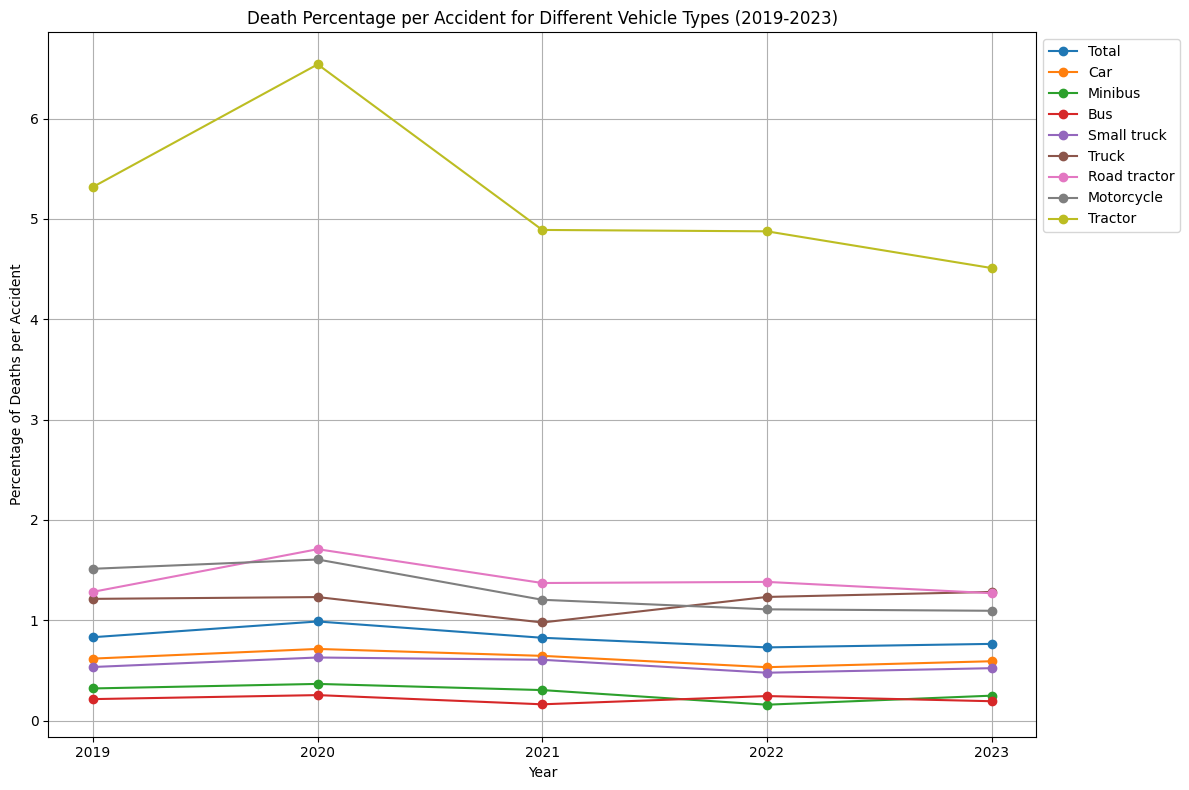

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Denote the new index values (getting rid of Turkish chars)
new_index = ["Total",'Car','Minibus','Bus','Small truck','Truck','Road tractor','Motorcycle','Tractor']


# Create a different dataframe for each year (2019-2023)
df_19 = pd.read_excel("2019type.xls", header=None)


pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

data_19 = df_19.iloc[8:17, :]

data_19 = data_19.drop([1,4,5], axis=1)


data_19.columns = ["Total","Accident", "Dead", "Injured"]
data_19 = data_19.set_index("Total")

data_19.index = new_index




df_20 = pd.read_excel("2020type.xls", header=None)


pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

data_20 = df_20.iloc[8:17, :]

data_20 = data_20.drop([1,4,5], axis=1)


data_20.columns = ["Total","Accident", "Dead", "Injured"]
data_20 = data_20.set_index("Total")

data_20.index = new_index



df_21 = pd.read_excel("2021type.xls", header=None)


pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

data_21 = df_21.iloc[8:17, :]

data_21 = data_21.drop([1,4,5], axis=1)


data_21.columns = ["Total","Accident", "Dead", "Injured"]
data_21 = data_21.set_index("Total")

data_21.index = new_index



df_22 = pd.read_excel("2022type.xls", header=None)


pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

data_22 = df_22.iloc[8:17, :]
data_22 = data_22.drop([3,4], axis=1)

data_22.columns = ["Total","Accident", "Dead", "Injured"]
data_22 = data_22.set_index("Total")

data_22.index = new_index



df_23 = pd.read_excel("2023type.xls", header=None)


pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)

data_23 = df_23.iloc[8:17, :]
data_23 = data_23.drop([3,4], axis=1)

data_23.columns = ["Total","Accident", "Dead", "Injured"]
data_23 = data_23.set_index("Total")

data_23.index = new_index



# List of vehicle types (index labels)
vehicle_types = [
    'Total',
    'Car',
    'Minibus',
    'Bus',
    'Small truck',
    'Truck',
    'Road tractor',
    'Motorcycle',
    'Tractor'
]

# Initialize a dictionary to store the percentages for each vehicle type
vehicle_death_percentages = {vehicle: [] for vehicle in vehicle_types}

# Loop through the dataframes (data_19, data_20, etc.)
for vehicle in vehicle_types:
    for data in [data_19, data_20, data_21, data_22, data_23]:
        # Calculate the death percentage for each vehicle type
        death_percentage = (data.loc[vehicle, 'Dead'] / data.loc[vehicle, 'Accident']) * 100
        vehicle_death_percentages[vehicle].append(death_percentage)

# Define the years corresponding to each DataFrame
years = [2019, 2020, 2021, 2022, 2023]

# Plotting the data
plt.figure(figsize=(12, 8))

# Plot each vehicle type's death percentage over the years
for vehicle, percentages in vehicle_death_percentages.items():
    plt.plot(years, percentages, marker='o', linestyle='-', label=vehicle)

# Title and labels
plt.title('Death Percentage per Accident for Different Vehicle Types (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Percentage of Deaths per Accident')
plt.grid(True)
plt.xticks(years)  # Ensuring all years are shown on the x-axis
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside the plot for clarity
plt.tight_layout()
plt.show()




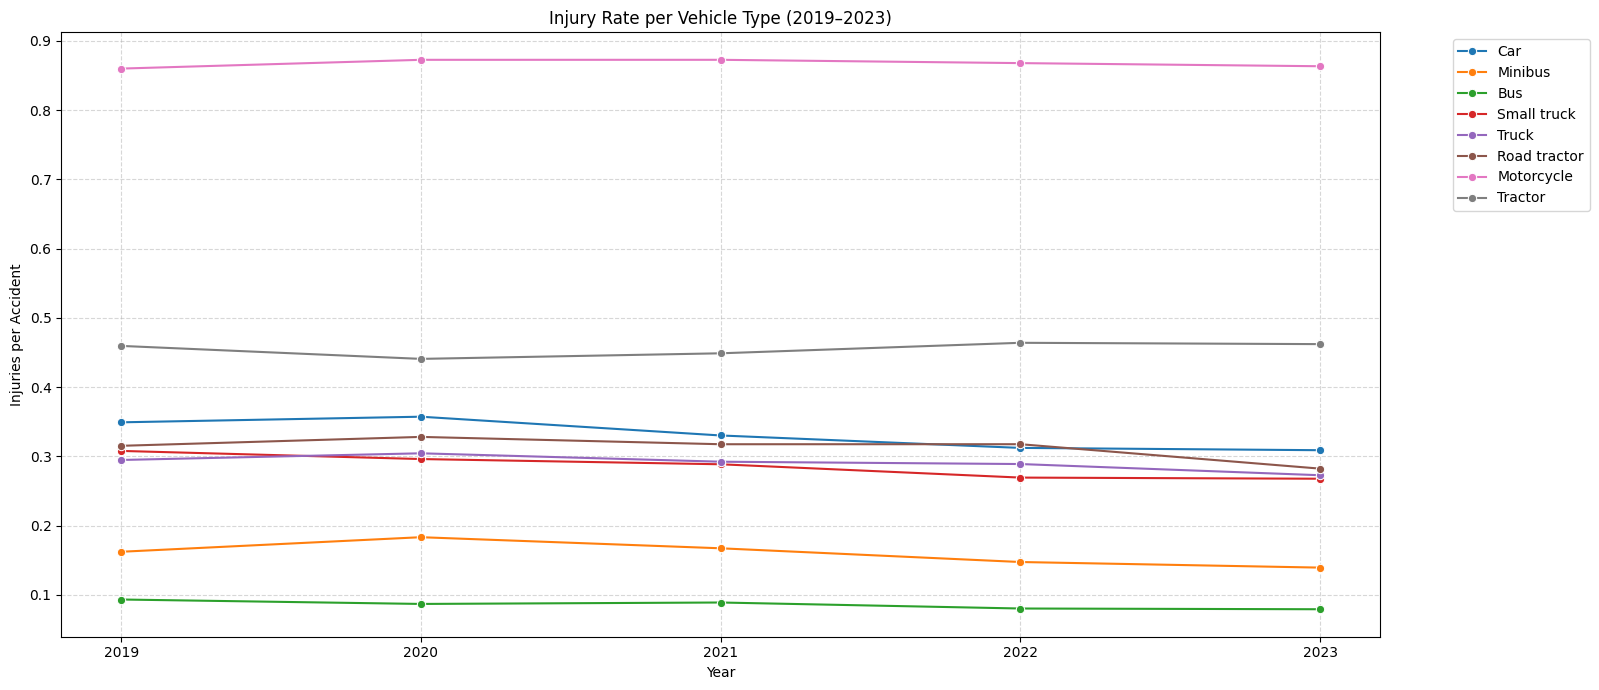

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare summary DataFrame
data_frames = [data_19, data_20, data_21, data_22, data_23]
years = [2019, 2020, 2021, 2022, 2023]

summary = pd.DataFrame()

for year, df in zip(years, data_frames):
    df_temp = df.copy()
    df_temp["Injury Rate"] = df_temp["Injured"] / df_temp["Accident"]
    df_temp["Year"] = year
    df_temp["Vehicle"] = df_temp.index
    summary = pd.concat([summary, df_temp])

# Drop "Total" row
summary = summary[summary["Vehicle"] != "Total"]

# Plot only injury rates
plt.figure(figsize=(14, 7))
sns.lineplot(data=summary, x="Year", y="Injury Rate", hue="Vehicle", marker="o")
plt.title("Injury Rate per Vehicle Type (2019–2023)")
plt.ylabel("Injuries per Accident")
plt.xticks(years)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


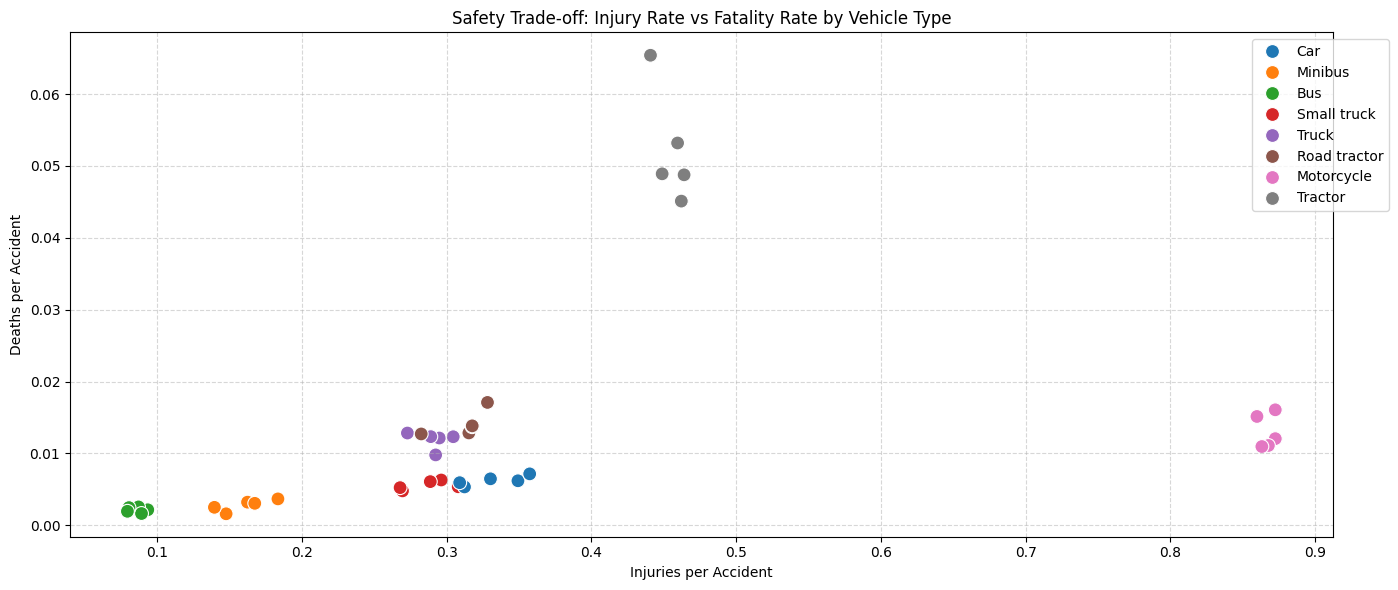

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine all years into one DataFrame
data_frames = [data_19, data_20, data_21, data_22, data_23]
years = [2019, 2020, 2021, 2022, 2023]

summary = pd.DataFrame()

for year, df in zip(years, data_frames):
    df_temp = df.copy()
    df_temp["Death Rate"] = df_temp["Dead"] / df_temp["Accident"]
    df_temp["Injury Rate"] = df_temp["Injured"] / df_temp["Accident"]
    df_temp["Year"] = year
    df_temp["Vehicle_Type"] = df_temp.index
    summary = pd.concat([summary, df_temp])

# Remove "Total" row
summary = summary[summary["Vehicle_Type"] != "Total"]

# Rename for compatibility with your plot code
summary = summary.rename(columns={"Death Rate": "Death_Percentage", "Injury Rate": "Injury_Rate"})

# Scatter Plot: Death vs Injury Rate
plt.figure(figsize=(14, 6))
sns.scatterplot(data=summary, x='Injury_Rate', y='Death_Percentage',
                hue='Vehicle_Type', s=100)
plt.title("Safety Trade-off: Injury Rate vs Fatality Rate by Vehicle Type")
plt.xlabel("Injuries per Accident")
plt.ylabel("Deaths per Accident")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Vehicle Safety Analysis (2019–2023)
1. Most Dangerous Vehicles:

  - Motorcycles

  - Road Tractors

2. Safest Vehicles:

  - Buses

  - Minibuses

3. Notable Trends:

  - 2020: Unusual patterns across all vehicle types.

  - Motorcycles: Highest volatility year-to-year.

4. Key Data Gaps:

  - Inconsistent time coverage (some charts end in 2021, others in 2023).

  - Unclear definitions (e.g., "per accident" methodology).

5. Immediate Actions:

  - Road Tractors & Motorcycles: Prioritize safety interventions.

  - Buses & Minibuses: Maintain current standards.

In [ ]:
import pandas as pd
from scipy import stats
import numpy as np

# Combine all yearly data into one DataFrame with year labels
def add_year_label(df, year):
    df['Year'] = year
    return df

# Apply to all yearly datasets
data_19 = add_year_label(data_19, 2019)
data_20 = add_year_label(data_20, 2020)
data_21 = add_year_label(data_21, 2021)
data_22 = add_year_label(data_22, 2022)
data_23 = add_year_label(data_23, 2023)

# Combine all years
combined_df = pd.concat([data_19, data_20, data_21, data_22, data_23])

# Calculate rates per accident
combined_df['Death_Rate'] = combined_df['Dead'] / combined_df['Accident']
combined_df['Injury_Rate'] = combined_df['Injured'] / combined_df['Accident']

# Remove 'Total' category as it's not a specific vehicle type
vehicle_df = combined_df[combined_df.index != 'Total']

# Prepare data for ANOVA - create lists of rates grouped by vehicle type
death_rates_by_vehicle = [vehicle_df.loc[vehicle, 'Death_Rate'].values for vehicle in vehicle_df.index.unique()]
injury_rates_by_vehicle = [vehicle_df.loc[vehicle, 'Injury_Rate'].values for vehicle in vehicle_df.index.unique()]

# Perform one-way ANOVA for death rates
f_stat_death, p_val_death = stats.f_oneway(*death_rates_by_vehicle)

# Perform one-way ANOVA for injury rates
f_stat_injury, p_val_injury = stats.f_oneway(*injury_rates_by_vehicle)

print("=== Death Rate ANOVA Results ===")
print(f"F-statistic: {f_stat_death:.4f}")
print(f"P-value: {p_val_death:.4f}")

print("\n=== Injury Rate ANOVA Results ===")
print(f"F-statistic: {f_stat_injury:.4f}")
print(f"P-value: {p_val_injury:.4f}")

# Interpretation
alpha = 0.05
if p_val_death < alpha:
    print("\nReject null hypothesis: Vehicle type DOES affect death rate")
else:
    print("\nFail to reject null hypothesis: No evidence vehicle type affects death rate")

if p_val_injury < alpha:
    print("Reject null hypothesis: Vehicle type DOES affect injury rate")
else:
    print("Fail to reject null hypothesis: No evidence vehicle type affects injury rate")

=== Death Rate ANOVA Results ===
F-statistic: 144.2181
P-value: 0.0000

=== Injury Rate ANOVA Results ===
F-statistic: 1354.4570
P-value: 0.0000

Reject null hypothesis: Vehicle type DOES affect death rate
Reject null hypothesis: Vehicle type DOES affect injury rate


# Hypothesis Test Results Summary
**Null Hypothesis (H₀):** "*Vehicle type DOES NOT change injury rate or death rate.*"

**Alternative Hyphothesis (H₁):** "*Vehicle type DOES change injury rate or death rate.*"

<br>

### Findings:

**Death Rates:**

- Extremely significant effect of vehicle type (F = 144.2, p < 0.001)

- Conclusion: Certain vehicles (e.g., tractors, motorcycles) have inherently higher fatality risks per accident than others (e.g., buses).

**Injury Rates:**

- Even stronger effect of vehicle type (F = 1354.5, p < 0.001)

- Conclusion: Vehicles like motorcycles cause far more injuries per accident than others (e.g., cars).

**Final Interpretation:**

- Reject H₀ for both death and injury rates.

- Vehicle type significantly impacts accident severity, with:

  - High-risk vehicles (tractors, motorcycles) showing extreme outcomes.

  - Low-risk vehicles (buses, minibuses) performing markedly better.